In [2]:
import cv2
import numpy as np
import numpy.fft as n
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from scipy import signal

# Read image file
f = cv2.imread('/home/dmacs/Desktop/MTech/104P/Images/DIP3E_CH03_Original_Images/Fig0333(a)(test_pattern_blurring_orig).tif',cv2.IMREAD_GRAYSCALE)

TypeError: Image data of dtype complex128 cannot be converted to float

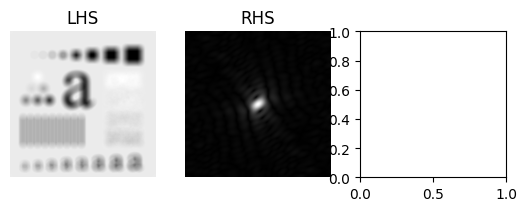

In [20]:
def frequencydomain(M, N):
    D0 = 15
    U, V = np.meshgrid(np.arange(N), np.arange(M))
    D = np.hypot(U - M / 2, V - N / 2)
    H = np.double(D <= D0)
    return H


M, N = f.shape
filter = frequencydomain(M, N)

LHS = n.ifftshift(n.ifft2(n.fft2(f) * n.fft2(filter)))

transform_image = n.ifft2(n.fft2(f))
transform_filter = n.ifft2(n.fft2(filter))
RHS = n.ifftshift(n.ifft2(f * filter))

# kernel = np.array([[1, 2, 1],[2, 4, 2],[1, 2, 1]]) / 15
# convolved_image = convolve2d(transform_image, transform_filter, mode = 'same', boundary = 'wrap')

plt.subplot(131)
plt.imshow(np.abs(LHS), cmap="gray")
plt.title("LHS")
plt.axis("off")

plt.subplot(132)
plt.imshow(np.abs(RHS), cmap="gray")
plt.title("RHS")
plt.axis("off")

plt.subplot(133)
plt.imshow(LHS-RHS, cmap="gray")
plt.title("DIFFERENCE")
plt.axis("off")
